# Prosper Loan Data 
## by Ramy Makram Abdallah Gendy

## Investigation Overview

> In this project, I will explore a dataset of Prosper Loan data, first do some data wrangling and cleaning, and then move on to different types of exploration to find relationships between different variables moving forward to our conclusion
## Dataset Overview

> There are 113,937 loans in the dataset with 81 characteristic. Most variables are numeric in nature, where some are categorical, boolean, also variables like EmploymentStatus ,Occupation are considered as factor variables. IsBorrowerHomeowner ,CurrentlyInGroup are binary variables .LoanStatus ,and BorrowerState are ordered factor variables. also other variables have a lot of null values, such as variables prosperrating and prosperscore, and some variables are not of much use, such as listingkey, listingnumber, of other identifiers.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv("prosperLoanData.csv")

In [3]:
# Cleaning
loan_cleaned = loan.copy()
loan_cleaned.columns = map(str.lower, loan_cleaned.columns)
loan_cleaned.columns = loan_cleaned.columns.str.replace(' ', '_')
# Remove columns I absolutely don't need for my analysis.
loan_cleaned.drop(columns = ['listingkey', 'listingnumber', 'groupkey', 'loankey', 'loannumber', 'memberkey', 'closeddate'], inplace = True)
# Deal with categorical variables' null values.
categorical_columns = loan_cleaned.select_dtypes(include = 'object').columns
loan_cleaned[categorical_columns] = loan_cleaned[categorical_columns].fillna('unknown')
loan_cleaned.drop(columns = ['borrowerapr','estimatedeffectiveyield', 'estimatedloss', 'estimatedreturn', \
                           'prosperrating_(numeric)', 'prosperscore'], inplace = True)
loan_cleaned.dropna(subset = ['employmentstatusduration', 'creditscorerangelower', 'creditscorerangeupper', \
                            'currentcreditlines', 'opencreditlines', 'totalcreditlinespast7years', 'currentdelinquencies', \
                            'amountdelinquent', 'delinquencieslast7years'], inplace = True)
loan_cleaned['debttoincomeratio'].fillna(loan_cleaned['monthlyloanpayment'] / loan_cleaned['statedmonthlyincome'], inplace = True)
loan_cleaned['debttoincomeratio'].replace(np.inf, np.nan, inplace = True)
loan_cleaned['debttoincomeratio'].fillna(loan_cleaned['monthlyloanpayment'] / (loan_cleaned['statedmonthlyincome'] + 1), inplace = True)
columns = ['totalprosperloans', 'totalprosperpaymentsbilled', 'ontimeprosperpayments', 'prosperpaymentslessthanonemonthlate',\
            'prosperpaymentsonemonthpluslate', 'prosperprincipalborrowed', 'prosperprincipaloutstanding']
for col in columns:
    loan_cleaned[col].fillna(0, inplace = True)
loan_cleaned.drop(columns = ['scorexchangeattimeoflisting', 'loanfirstdefaultedcyclenumber', 'lp_customerpayments',\
                          'lp_customerprincipalpayments', 'lp_interestandfees', 'lp_servicefees', 'lp_collectionfees',\
                          'lp_grossprincipalloss', 'lp_netprincipalloss', 'lp_nonprincipalrecoverypayments'], inplace = True)

In [4]:
loan_analysis = loan_cleaned[loan_cleaned['loanstatus'].isin(['Completed', 'Chargedoff', 'Defaulted', 'Past Due (1-15 days)', \
                                                          'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)'\
                                                         'Past Due (16-30 days)', 'Past Due (>120 days)'])]
loan_analysis['default'] = np.where(loan_analysis['loanstatus'] == 'Completed', 0, 1)

## Default Loans Percentage

> A new variable called **Default** is created to base on the priginal variable LoanStatus. 1 represents the loan is default, and 0 means the loan has been completed.

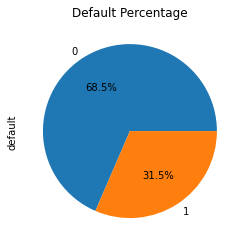

In [5]:
loan_analysis['default'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');
plt.title('Default Percentage');

## Borrower Rate by Default

> Borrower rate is the borrower's interest rate of the loan. From the plot, we see that with loans that are defaulted, borrower rate are higher.

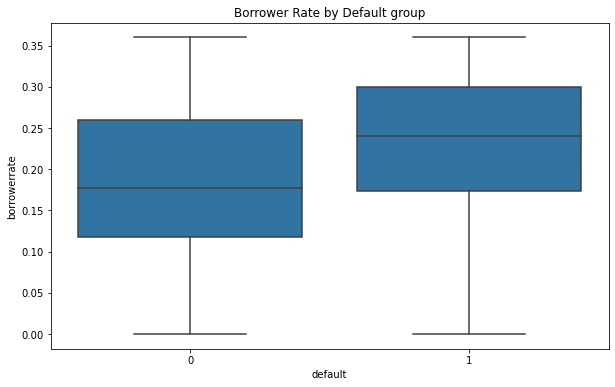

In [6]:
base_color = sb.color_palette()[0]
plt.figure(figsize = (10, 6))
sb.boxplot(data = loan_analysis, x = 'default', y = 'borrowerrate', color = base_color);
plt.title('Borrower Rate by Default group');

## Default Rate by Income Group

The highest default rate come from *Not Employed* and *\\$0* group, which increases the possibility of not being able to pay the loan.

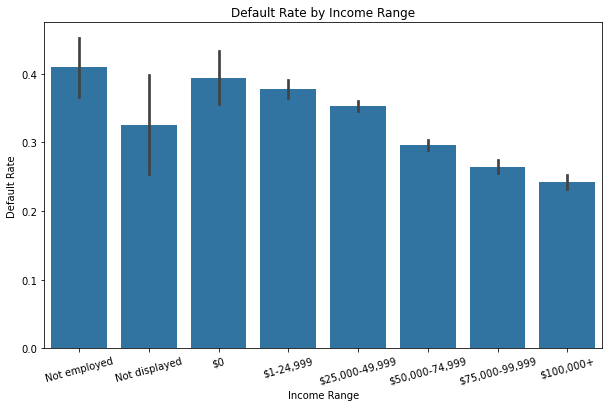

In [7]:
income_classes = ['Not employed', 'Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
loan_analysis['incomerange'] = pd.Categorical(loan_analysis['incomerange'], categories = income_classes, ordered = True)
plt.figure(figsize = (10, 6))
sb.barplot(data = loan_analysis, x = 'incomerange', y = 'default', color = base_color);
plt.xticks(rotation = 15);
plt.xlabel('Income Range');
plt.ylabel('Default Rate');
plt.title('Default Rate by Income Range');

## Borrower Rate by Credit Score Range Lower & Default
> A strong negative correlation between credit scroe (lower range) and default rate. with each credit score, the borrower rate for default group are higher.

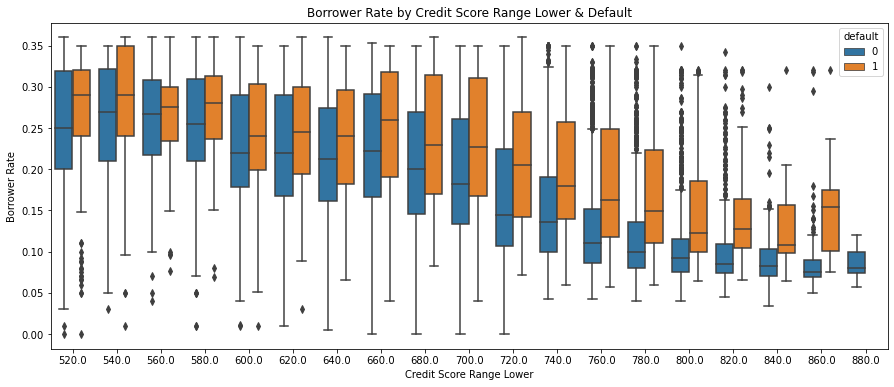

In [8]:
plt.figure(figsize = (15, 6))
sb.boxplot(data = loan_analysis, x = 'creditscorerangelower', y = 'borrowerrate', hue = 'default');
plt.xlabel('Credit Score Range Lower');
plt.ylabel('Borrower Rate');
plt.title('Borrower Rate by Credit Score Range Lower & Default');

In [1]:
!jupyter nbconvert Prosper_Loan_Data_Slide.ipynb --to slides --post serve --no-input --no-prompt

^C
